Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion

**1. Import Librarires**

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Defining the path for train and test images for CNN/Skin Data Store
root_path = '/content/drive/MyDrive/Skin_Data_Store'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


2. Create a dataset

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
## Train Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
## test Dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir_test,image_size=(img_height, img_width),batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [11]:
## class name & storing it in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


3. Visualize the data

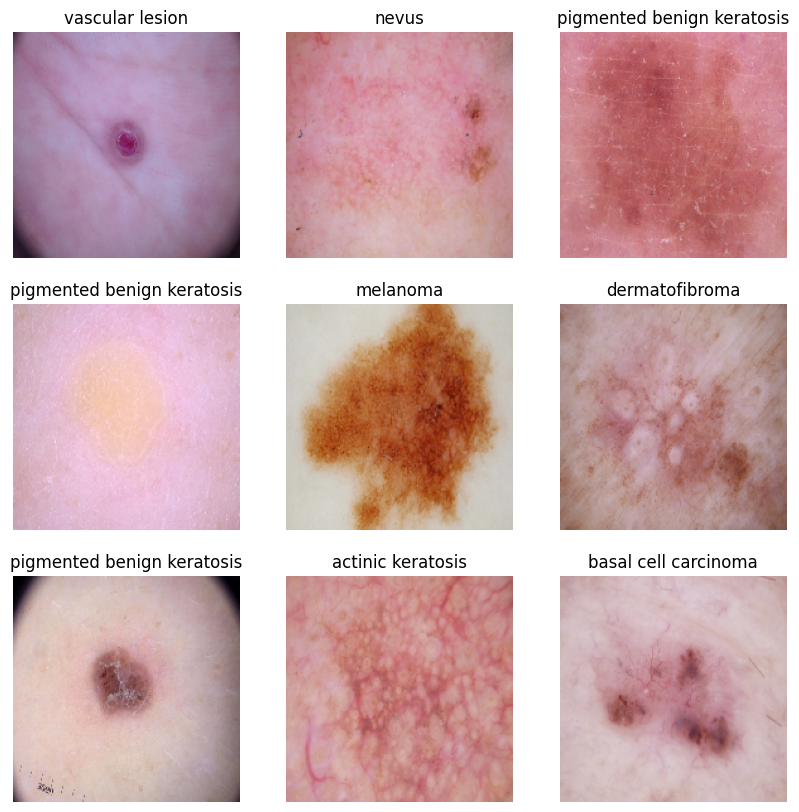

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

4. Create the model

In [26]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Rescaling

num_classes = len(class_names)
input_shape = (180,180,3)
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(class_names), activation="softmax"))
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,039,433 (7.78 MB)

 Trainable params: 2,039,433 (7.78 MB)

 Non-trainable params: 0 (0.00 B)

5. Compile the model

In [30]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
# View the summary of all layers
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,039,433 (7.78 MB)

 Trainable params: 2,039,433 (7.78 MB)

 Non-trainable params: 0 (0.00 B)

6. Train the model

In [32]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.2380 - loss: 2.0338 - val_accuracy: 0.4027 - val_loss: 1.6979
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3828 - loss: 1.6879 - val_accuracy: 0.4452 - val_loss: 1.6147
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.4534 - loss: 1.5276 - val_accuracy: 0.5302 - val_loss: 1.5079
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5062 - loss: 1.4391 - val_accuracy: 0.5481 - val_loss: 1.3868
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5378 - loss: 1.3502 - val_accuracy: 0.5503 - val_loss: 1.3646
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5629 - loss: 1.2427 - val_accuracy: 0.5324 - val_loss: 1.4672
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5964 - loss: 1.1364 - val_accuracy: 0.5123 - val_loss: 1.4204
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5927 - loss: 1.1761 - val_accuracy: 0.5481 - v

Visualizing training results

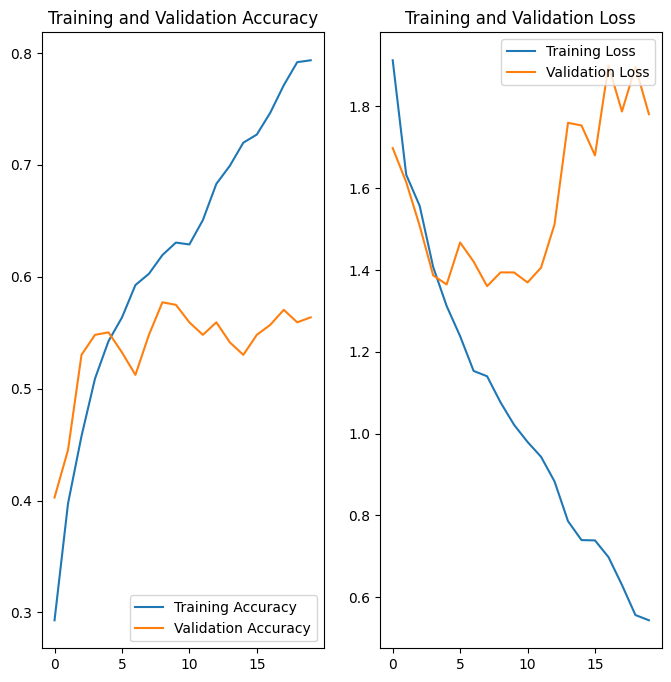

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:

1.   We can clearly observe a drastic difference between Traning and Validation Accuracy, which indicates that the model has overfitted
2.  Also we can observe that the validation accuracy the model has achieved is *51* % Overall we need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of the model

Data Augmentation

In [34]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

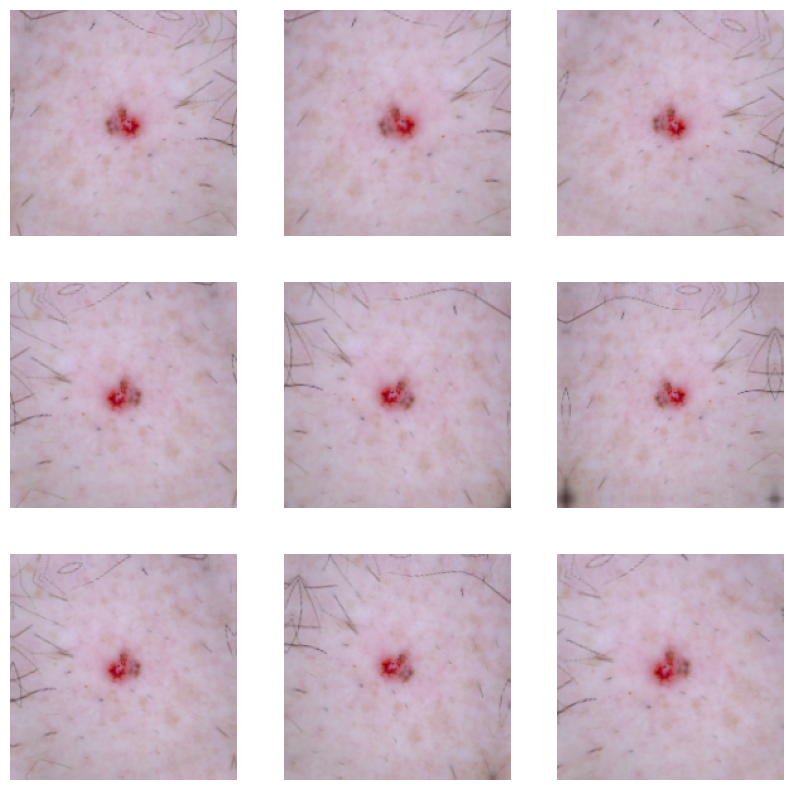

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

7.Create the model, compile and train the model

In [37]:
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(class_names), activation="softmax"))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 180, 180, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 90, 90, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (32, 90, 90, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 45, 45, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (32, 45, 45, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 22, 22, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (32, 22, 22, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (32, 61952)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 128)                   │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (32, 9)                     │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [38]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [39]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.2044 - loss: 2.1924 - val_accuracy: 0.3311 - val_loss: 1.7748
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.3932 - loss: 1.6879 - val_accuracy: 0.4183 - val_loss: 1.5568
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4426 - loss: 1.5721 - val_accuracy: 0.5257 - val_loss: 1.4443
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4852 - loss: 1.4695 - val_accuracy: 0.4966 - val_loss: 1.4697
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.4852 - loss: 1.4501 - val_accuracy: 0.4295 - val_loss: 1.6833
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.4494 - loss: 1.5103 - val_accuracy: 0.5101 - val_loss: 1.3979
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5182 - loss: 1.3689 - val_accuracy: 0.5056 - val_loss: 1.3952
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5416 - loss: 1.3159 - val_accuracy: 0.5257 - v

Visualizing the results

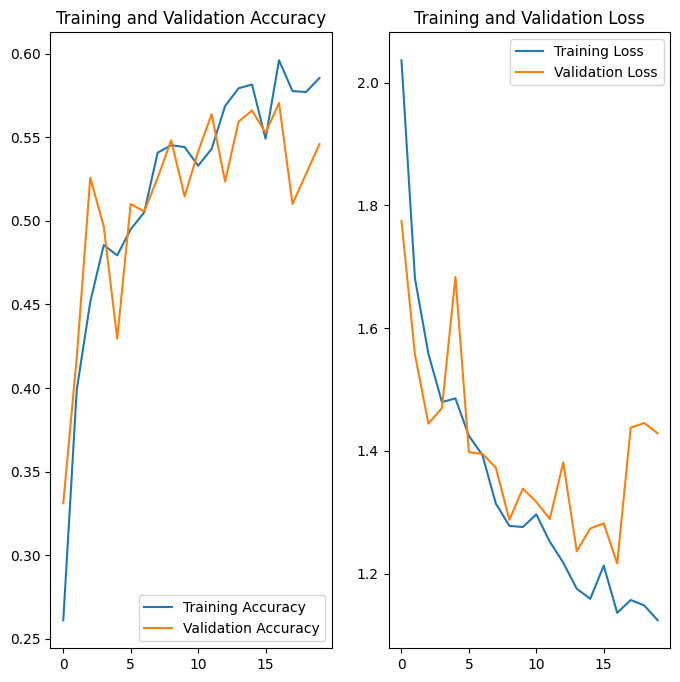

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:
As we can see that now the Training and Validation accuracy are almost in the same level and the highest accuracy achieved is around 58% , this shows the impact of how performing Data Augmentation can improve the model performance
But we can still try to increase the accuracy of the model

**Find the distribution of classes in the training dataset.**

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [42]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/drive/MyDrive/Skin_Data_Store/Train/a...,actinic keratosis
1,/content/drive/MyDrive/Skin_Data_Store/Train/a...,actinic keratosis
2,/content/drive/MyDrive/Skin_Data_Store/Train/a...,actinic keratosis
3,/content/drive/MyDrive/Skin_Data_Store/Train/a...,actinic keratosis
4,/content/drive/MyDrive/Skin_Data_Store/Train/a...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Skin_Data_Store/Train/v...,vascular lesion
2235,/content/drive/MyDrive/Skin_Data_Store/Train/v...,vascular lesion
2236,/content/drive/MyDrive/Skin_Data_Store/Train/v...,vascular lesion
2237,/content/drive/MyDrive/Skin_Data_Store/Train/v...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


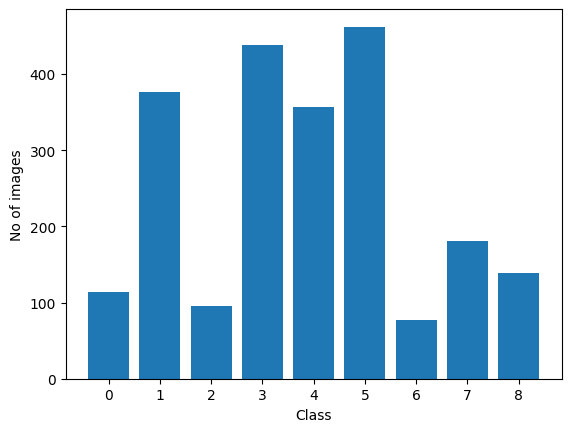

In [43]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

Which class has the least number of samples?
*   From the above bar chart we can see that the class with **label 6** has the
least number of samples

Which classes dominate the data in terms proportionate number of samples?

* We can observe that of all the class, class with **label 5** has the most
number of samples

In [44]:
!pip install Augmentor

In [46]:
path_to_training_dataset = '/content/drive/MyDrive/Skin_Data_Store/Train'
import Augmentor
for i in class_names:
    #print(str(path_to_training_dataset) + "/" + i)
    #print(str(root_path) + i +'/output/')
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i, output_directory = '/content/drive/MyDrive/Skin_Data_Store/Train' + i +'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACE966121D0>: 100%|██████████| 500/500 [00:29<00:00, 16.78 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainbasal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACE83E891B0>: 100%|██████████| 500/500 [00:29<00:00, 16.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Traindermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACE934867A0>: 100%|██████████| 500/500 [00:27<00:00, 18.24 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainmelanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1936x1296 at 0x7ACEA4404520>: 100%|██████████| 500/500 [01:43<00:00,  4.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainnevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=959x723 at 0x7ACE8184DA80>: 100%|██████████| 500/500 [01:43<00:00,  4.85 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainpigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACEA4404850>: 100%|██████████| 500/500 [00:27<00:00, 18.12 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainseborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ACE76B03100>: 100%|██████████| 500/500 [00:52<00:00,  9.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainsquamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACE917D3790>: 100%|██████████| 500/500 [00:29<00:00, 17.05 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_Data_Store/Trainvascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ACEA4406EC0>: 100%|██████████| 500/500 [00:28<00:00, 17.67 Samples/s]


In [47]:
output_dir = pathlib.Path('/content/drive/MyDrive/Skin_Data_Store')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [48]:
path_list = [x for x in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
path_list[:5]

['/content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/actinic keratosis_original_ISIC_0026765.jpg_8d9ffba8-7440-494b-b9d9-0f3472c78745.jpg',
 '/content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_cebbcbdf-e839-40e8-9b1f-8096619aaf3e.jpg',
 '/content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/actinic keratosis_original_ISIC_0033413.jpg_dedaf6be-e53e-464a-bedc-281b6d0c9698.jpg',
 '/content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/actinic keratosis_original_ISIC_0027958.jpg_17d54a33-c61d-4449-87b6-89d0c8dfc3a4.jpg',
 '/content/drive/MyDrive/Skin_Data_Store/Trainactinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_0ed0ccdc-fbba-4c2c-b18a-8c0577272fff.jpg']

In [49]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
lesion_list_new[:5]

['Trainactinic keratosis',
 'Trainactinic keratosis',
 'Trainactinic keratosis',
 'Trainactinic keratosis',
 'Trainactinic keratosis']

In [50]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [51]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)

In [52]:
new_df['Label'].value_counts()

,count
Label,
Trainactinic keratosis,1000
Trainbasal cell carcinoma,1000
Trainsquamous cell carcinoma,1000
Trainseborrheic keratosis,1000
Trainpigmented benign keratosis,1000
Trainnevus,1000
Trainmelanoma,1000
Traindermatofibroma,1000
Trainvascular lesion,1000


9.Train the model on the data created using Augmentor

In [53]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [54]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


Create a validation dataset

In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


Create your model (make sure to include normalization)

In [56]:
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       3,964,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,058,825 (15.48 MB)

 Trainable params: 4,058,825 (15.48 MB)

 Non-trainable params: 0 (0.00 B)

Compile your model (Choose optimizer and loss function appropriately)

In [57]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Train your model

In [58]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.1885 - loss: 2.4604 - val_accuracy: 0.3423 - val_loss: 2.0190
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.2805 - loss: 1.9418 - val_accuracy: 0.3960 - val_loss: 1.7329
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.3999 - loss: 1.6800 - val_accuracy: 0.5123 - val_loss: 1.5186
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.4806 - loss: 1.5528 - val_accuracy: 0.5056 - val_loss: 1.4704
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.4975 - loss: 1.4377 - val_accuracy: 0.5101 - val_loss: 1.4686
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5123 - loss: 1.4034 - val_accuracy: 0.5101 - val_loss: 1.4361
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.5152 - loss: 1.3688 - val_accuracy: 0.5257 - val_loss: 1.4188
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.5291 - loss: 1.3523 - val_accuracy: 0.5011 - v

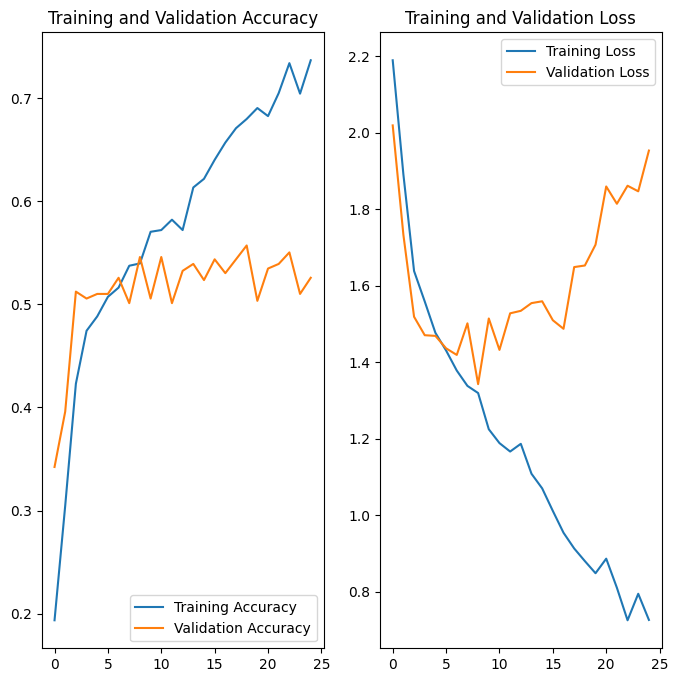

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Findings: **bold text**
We can infer that the Model is fit with a good enough accuracy for both Train and Validation Data of max accuracy around 73% Rectifying the Class Imbalance and performing Data augumentation on the dataset has resulted in a model with higher accuracy and overcoming overfitting This is a good model to be used to predict Skin Cancer using CNN